In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import numpy as np
import pandas as pd
import seaborn as sb
import operator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from ipywidgets import interact
import sys
sys.path.append('/content/drive/My Drive/TG - Christian Camilo Rosero/Codigo/NL_PCA')
from sklearn_nlpca import NLPCA









**DEMO CON DATOS DE ESTRELLAS**

In [ ]:
baseDir = '/content/drive/My Drive/TG - Christian Camilo Rosero/Codigo/NL_PCA/'
file = baseDir + 'Star_data.csv'
print(file)
data_all = pd.read_csv(file, names=list(range(25))) #data are attached below
data_all

/content/drive/My Drive/TG - Christian Camilo Rosero/Codigo/NL_PCA/Star_data.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,400.0,2.9,7.8,7.4,0.6,2.8,0.4,3.0,0.7,2.3,0.6,0.7,6.7,1.0,0.8,0.9,1.2,1.7,1.0,0.5,38,0.48,3.59,-0.35,2
1,693.0,3.3,7.5,7.3,0.5,2.9,0.4,2.6,0.6,2.5,0.6,0.6,6.3,0.8,0.6,1.0,0.9,1.6,1.2,0.4,35,0.49,3.51,-0.38,2
2,1522.0,-13.1,10.5,10.3,1.9,0.0,2.2,6.1,2.1,-1.3,1.8,2.2,7.4,2.1,2.7,2.3,2.4,4.1,3.9,1.8,52,1.20,-1.20,-0.05,4
3,2454.0,4.8,6.5,6.8,0.4,3.4,0.2,1.9,0.3,3.3,0.5,0.5,6.7,0.4,0.7,1.0,0.7,1.5,1.0,0.4,36,0.43,3.24,-0.37,2
4,2952.0,-9.6,10.3,9.7,1.5,0.2,1.4,6.4,2.0,-1.3,1.5,1.8,6.5,2.0,2.2,2.0,2.2,3.6,3.0,1.4,50,1.04,0.62,-0.29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,222370.0,2.5,8.0,7.6,0.6,2.8,0.5,3.0,0.7,2.4,0.7,0.8,6.9,0.9,1.0,1.1,1.1,1.9,1.4,0.6,37,0.51,3.43,-0.17,2
483,222400.0,-10.0,9.9,9.4,1.8,0.9,1.9,6.3,2.2,-1.6,1.7,1.7,7.0,2.1,2.3,2.3,3.7,4.1,3.7,1.5,51,1.03,2.51,0.00,4
484,223170.0,-10.1,10.4,10.0,1.6,0.0,1.7,6.8,2.2,-1.6,1.6,2.0,7.2,2.1,2.4,2.1,2.4,3.9,3.6,1.7,51,1.11,1.25,-0.08,4
485,223250.0,-8.5,10.1,9.5,1.3,0.3,1.0,6.1,1.8,-0.7,1.3,1.6,6.8,1.9,1.9,1.7,1.8,3.4,2.7,1.3,48,0.94,0.73,-0.28,3


In [ ]:
data = data_all.loc[:,1:19]# spectral values only
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.9,7.8,7.4,0.6,2.8,0.4,3.0,0.7,2.3,0.6,0.7,6.7,1.0,0.8,0.9,1.2,1.7,1.0,0.5
1,3.3,7.5,7.3,0.5,2.9,0.4,2.6,0.6,2.5,0.6,0.6,6.3,0.8,0.6,1.0,0.9,1.6,1.2,0.4
2,-13.1,10.5,10.3,1.9,0.0,2.2,6.1,2.1,-1.3,1.8,2.2,7.4,2.1,2.7,2.3,2.4,4.1,3.9,1.8
3,4.8,6.5,6.8,0.4,3.4,0.2,1.9,0.3,3.3,0.5,0.5,6.7,0.4,0.7,1.0,0.7,1.5,1.0,0.4
4,-9.6,10.3,9.7,1.5,0.2,1.4,6.4,2.0,-1.3,1.5,1.8,6.5,2.0,2.2,2.0,2.2,3.6,3.0,1.4


In [ ]:
data.shape

(487, 19)

In [ ]:
group_raw = data_all.loc[:,24]
group = group_raw.replace([3, 2, 4, 1, 0, 6], [1, 2, 3, 5, 4, 6])
group.head()
group.shape

(487,)

In [ ]:
pca_lineal = PCA(n_components=3)
pca_lineal.fit(data)
percent_pc = pca_lineal.explained_variance_ratio_

percent_pc=percent_pc*100
percent_pc=(np.round(percent_pc*100))/100
print('Explained variance (see: net.variance)\n')
for i in range(3):
  print('linear PC ',i+1,': ',percent_pc[i],'%')

X=pca_lineal.transform(data)

X_MIN = X[:,0].min()-1
X_MAX = X[:,0].max()+1
Y_MIN = X[:,1].min()-1
Y_MAX = X[:,1].max()+1
Z_MIN = X[:,2].min()-1
Z_MAX = X[:,2].max()+1

def plot_3D(elev=13, azim=55):
 
    plt.figure(figsize=(20,10))
    ax = plt.subplot(projection='3d')
    b1 = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=group, s=10, cmap='hot')
    ax.view_init(elev=elev, azim=azim)
    # Some presentation tweaks
    ax.set_xlim((X_MIN, X_MAX))
    ax.set_ylim((Y_MIN, Y_MAX))
    ax.set_zlim((Z_MIN, Z_MAX))

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    

interact(plot_3D, elev=(0, 360), azim=(0, 360));

Explained variance (see: net.variance)

linear PC  1 :  88.81 %
linear PC  2 :  5.52 %
linear PC  3 :  2.25 %


interactive(children=(IntSlider(value=13, description='elev', max=360), IntSlider(value=55, description='azim'…

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=(1, 3) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
Epoch 0/1000
 10/10 [==============================]
Epoch 100/1000
 10/10 [==============================] - loss: 0.28130 - similarity: 90.76% - val_loss: 0.28067 - val_similarity: 90.78%
Epoch 200/1000
 10/10 [==============================] - loss: 0.20048 - similarity: 89.89% - val_loss: 0.20025 - val_similarity: 89.88%
Epoch 300/1000
 10/10 [==============================] - loss: 0.16830 - similarity: 89.68% - val_loss: 0.16815 - val_similarity: 89.69%
Epoch 400/1000
 10/10 [==============================] - loss: 0.14332 - similarity: 90.88% - val_loss: 0.14324 - val_similarity: 90.88%
Epoch 500/1000
 10/10 [=============

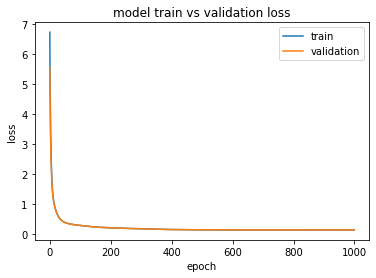

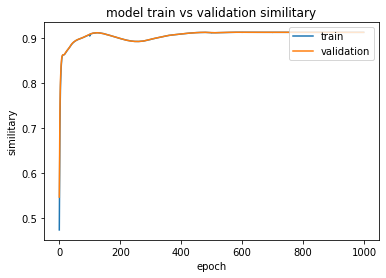

Total Explained variance for nonlinear PC: 94.56 %
Explained variance (see: net.variance)

nonlinear PC  1 :  92.5 %
nonlinear PC  2 :  1.41 %
nonlinear PC  3 :  0.0 %


In [ ]:
nlpca=NLPCA(3, max_iteration=1000, opti_algoritm='adamax',pre_pca=False,  units_per_Hidden_layer=8, weight_initialization='linear', function_activation_nonlinear='relu')
NLPCA.fit(data, group)

In [ ]:
# pca_nonlineal = NLPCA.get_components(data)
# percent_pc = pca_nonlineal.explained_variance_ratio_

# percent_pc=percent_pc*100
# percent_pc=(np.round(percent_pc*100))/100
# print('Explained variance (see: net.variance)\n')
# for i in range(3):
#   print('linear PC ',i+1,': ',percent_pc[i],'%')

X=NLPCA.get_components(data)*10

X_MIN = X[:,0].min()-1
X_MAX = X[:,0].max()+1
Y_MIN = X[:,1].min()-1
Y_MAX = X[:,1].max()+1
Z_MIN = X[:,2].min()-1
Z_MAX = X[:,2].max()+1

def plot_3D(elev=13, azim=55):
 
    plt.figure(figsize=(20,10))
    ax = plt.subplot(projection='3d')
    b1 = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=group, s=10, cmap='hot')
    ax.view_init(elev=elev, azim=azim)
    # Some presentation tweaks
    ax.set_xlim((X_MIN, X_MAX))
    ax.set_ylim((Y_MIN, Y_MAX))
    ax.set_zlim((Z_MIN, Z_MAX))

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    

interact(plot_3D, elev=(0, 360), azim=(0, 360));

interactive(children=(IntSlider(value=13, description='elev', max=360), IntSlider(value=55, description='azim'…